# Equalizer
## The below program illustrates a basic 8-band equalizer based on Fast Forier Transform(FFT) and Inverse Fast Forier Transform(IFFT)

### The below part imports the liberaries and audio and does the fft

In [126]:
#importing the libraries
%matplotlib inline
import seaborn
import numpy, scipy, matplotlib.pyplot as plt, librosa, IPython.display as ipd


#importing the audio file
OrigSound, sr = librosa.load('audio\c_strum.wav')
nft=sr*4;

#performing the FFT on original sound.
OrigFFT = scipy.fft(OrigSound)

### Function to display the frequency spectrums of the audio file, which is used later to display the changes in the given and modified audio 

In [127]:
def fftgraph(x):
    X = scipy.fft(x)
    X_mag = numpy.absolute(X)
    freq = numpy.linspace(0, sr, len(X_mag)) # frequency variable

    plt.figure(figsize=(6, 2))
    plt.plot(freq, X_mag) # magnitude spectrum
    plt.xlabel('Frequency (Hz)')

    plt.figure(figsize=(6, 2))
    plt.plot(freq[:5000], X_mag[:5000])
    plt.xlabel('Frequency (Hz)')

### Below matrix act like the 8 nobs of various frequany range bins:
### For modification, each bin can hold a value from 0 up till 10
### 1) A Value 5 at nob[0] would mean that the frquency range bin at nob[0] ( say 128 Hz to 256 Hz) would be multiplied by a factor of 0.5 
### 2) A Value 8 at nob[1] would mean that the frquency range bin at nob[1] ( say 256 Hz to 512 Hz) would be multiplied by a factor of 0.8

In [128]:
#amplitude of each frequency range
nobVal = [10,10,10,10,5,5,5,5] 

In [129]:
Gain=1; #gain


#normalizing the nobs from range of 0 to 10 to range of 0 to 1 by diving each nob value by 10.
nobVal[:] = [i/10 for i in nob]

#frequency array
freq = [32,64,128,256,512,1000,2000,3000]

#initializing a bin array
bin = [0] * 8

for i in range (0,8):
    bin[i]= int((freq[i]*nft)/sr)
    
    
#scaling the frequencies
freq[:] = [i*sr/nft for i in (0,nft-1)]


#defing the end of the spectrum since it will be required due to symmetry.
end = int(X[-1])

#equalising according to input
for i in range (0,7):
    OrigFFT[bin[i]:bin[i+1]]=OrigFFT[bin[i]:bin[i+1]]*nobVal[i]*Gain;
    OrigFFT[(end-bin[i+1]):(end-bin[i])]=OrigFFT[(end-bin[i+1]):(end-bin[i])]*nobVal[i]*Gain;

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


In [130]:
print("Orignal sound: ")
ipd.Audio(OrigSound, rate=sr)

Orignal sound: 


In [131]:
#Perfoming an IFFT operation on the modified frequencis to get the new audio.
modifiedSound = scipy.ifft(OrigFFT)
print("Modified sound: ")
ipd.Audio(modifiedSound, rate=sr)

Modified sound: 


The freq spectrum based on original music file:


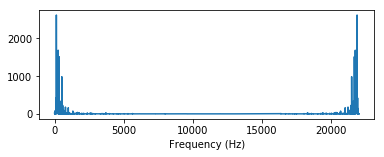

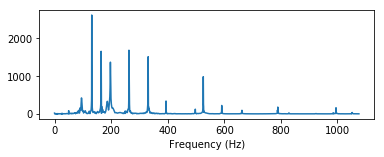

In [132]:
print("The freq spectrum based on original music file:")
fftgraph(OrigSound)

The freq spectrum based on equalized wave:


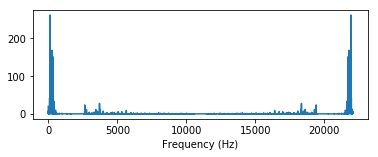

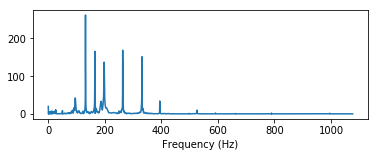

In [133]:
print("The freq spectrum based on equalized wave:")
fftgraph(modifiedSound)